In [52]:
!python --version

Python 3.12.3


In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os


%matplotlib inline

In [54]:
os.getcwd()

'C:\\Users\\001\\Documents\\workbench\\myenv'

In [55]:
os.chdir('C:\\Users\\001\\Downloads')

In [56]:
os.getcwd()

'C:\\Users\\001\\Downloads'

In [57]:
file_name = 'churn_modelling_bank.csv'

In [58]:
raw_data = pd.read_csv(file_name)
data = raw_data.copy()
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [59]:
os.chdir('C:\\Users\\001\\Documents\\workbench\\myenv')

# EXPLORATORY DATA ANALYSIS

In [60]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [62]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
# dropping CustomerId, RowNumber, Surname from dataset as it has no statistical value in this analysis
data.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

### Data deduction <br>
* The data is a mix of categorical and numerical data <br>
* The data contains 14 featurs and 10,000 rows <br>
* The data is complete and has no missing

In [64]:
# checking if there are any duplicated intances in the data
data.duplicated().sum()

0

### Creating python function that splits data into numerical and categorical data

In [65]:
#input dataframe
# This funtion does the following:
# 1. splits data into categorical and numerical subdata
# 2. checks for skewnes in the numerical data
# 3. checks for outliers in the numerical data 

# Returns catergorical and numerical dataframe


def cat_num_splitter(data):
    cols = list(data.columns)
    cat_cols = []
    num_cols = []
    for col in cols:
        if data[col].dtype == 'int64' or data[col].dtype == 'int32' or data[col].dtype == 'float64':
            num_cols.append(col)
        else:
            cat_cols.append(col)

    cat_df = data[cat_cols]
    num_df = data[num_cols]

    return cat_df, num_df

In [66]:
cat_df, num_df = cat_num_splitter(data)

In [67]:
cat_df, num_df

(     Geography  Gender
 0       France  Female
 1        Spain  Female
 2       France  Female
 3       France  Female
 4        Spain  Female
 ...        ...     ...
 9995    France    Male
 9996    France    Male
 9997    France  Female
 9998   Germany    Male
 9999    France  Female
 
 [10000 rows x 2 columns],
       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619   42       2       0.00              1          1   
 1             608   41       1   83807.86              1          0   
 2             502   42       8  159660.80              3          1   
 3             699   39       1       0.00              2          0   
 4             850   43       2  125510.82              1          1   
 ...           ...  ...     ...        ...            ...        ...   
 9995          771   39       5       0.00              2          1   
 9996          516   35      10   57369.61              1          1   
 9997          709   36       7    

### inspecting the categorical features in data for any labeling errors

In [68]:
def feature_inspec(data):

    '''
    this function inspects data columns to get the data type
    input: input the data you want to inspect
    output: returns the analysis and data type of each columm in the data
    '''   
    
    for col in data.columns:
        type = data[col].dtype
        content = list(data[col])
        print(f'{col} contains {content[0:4]} and is currently of the {type} datatype')
        print('**********************************************')


In [69]:
feature_inspec(cat_df)

Geography contains ['France', 'Spain', 'France', 'France'] and is currently of the object datatype
**********************************************
Gender contains ['Female', 'Female', 'Female', 'Female'] and is currently of the object datatype
**********************************************


As seen above there are no repeated instances of values in the feature labels therefore the data is good

In [70]:
# concatination the numerical and categorical data
df = pd.concat([cat_df, num_df], axis = 1)

### Visualizing the Data

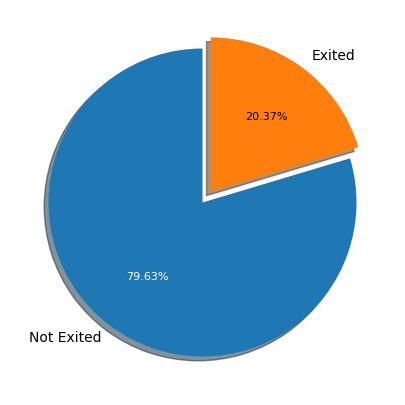

In [71]:
# showing graphical representation of churn customers against customers that stayed

values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

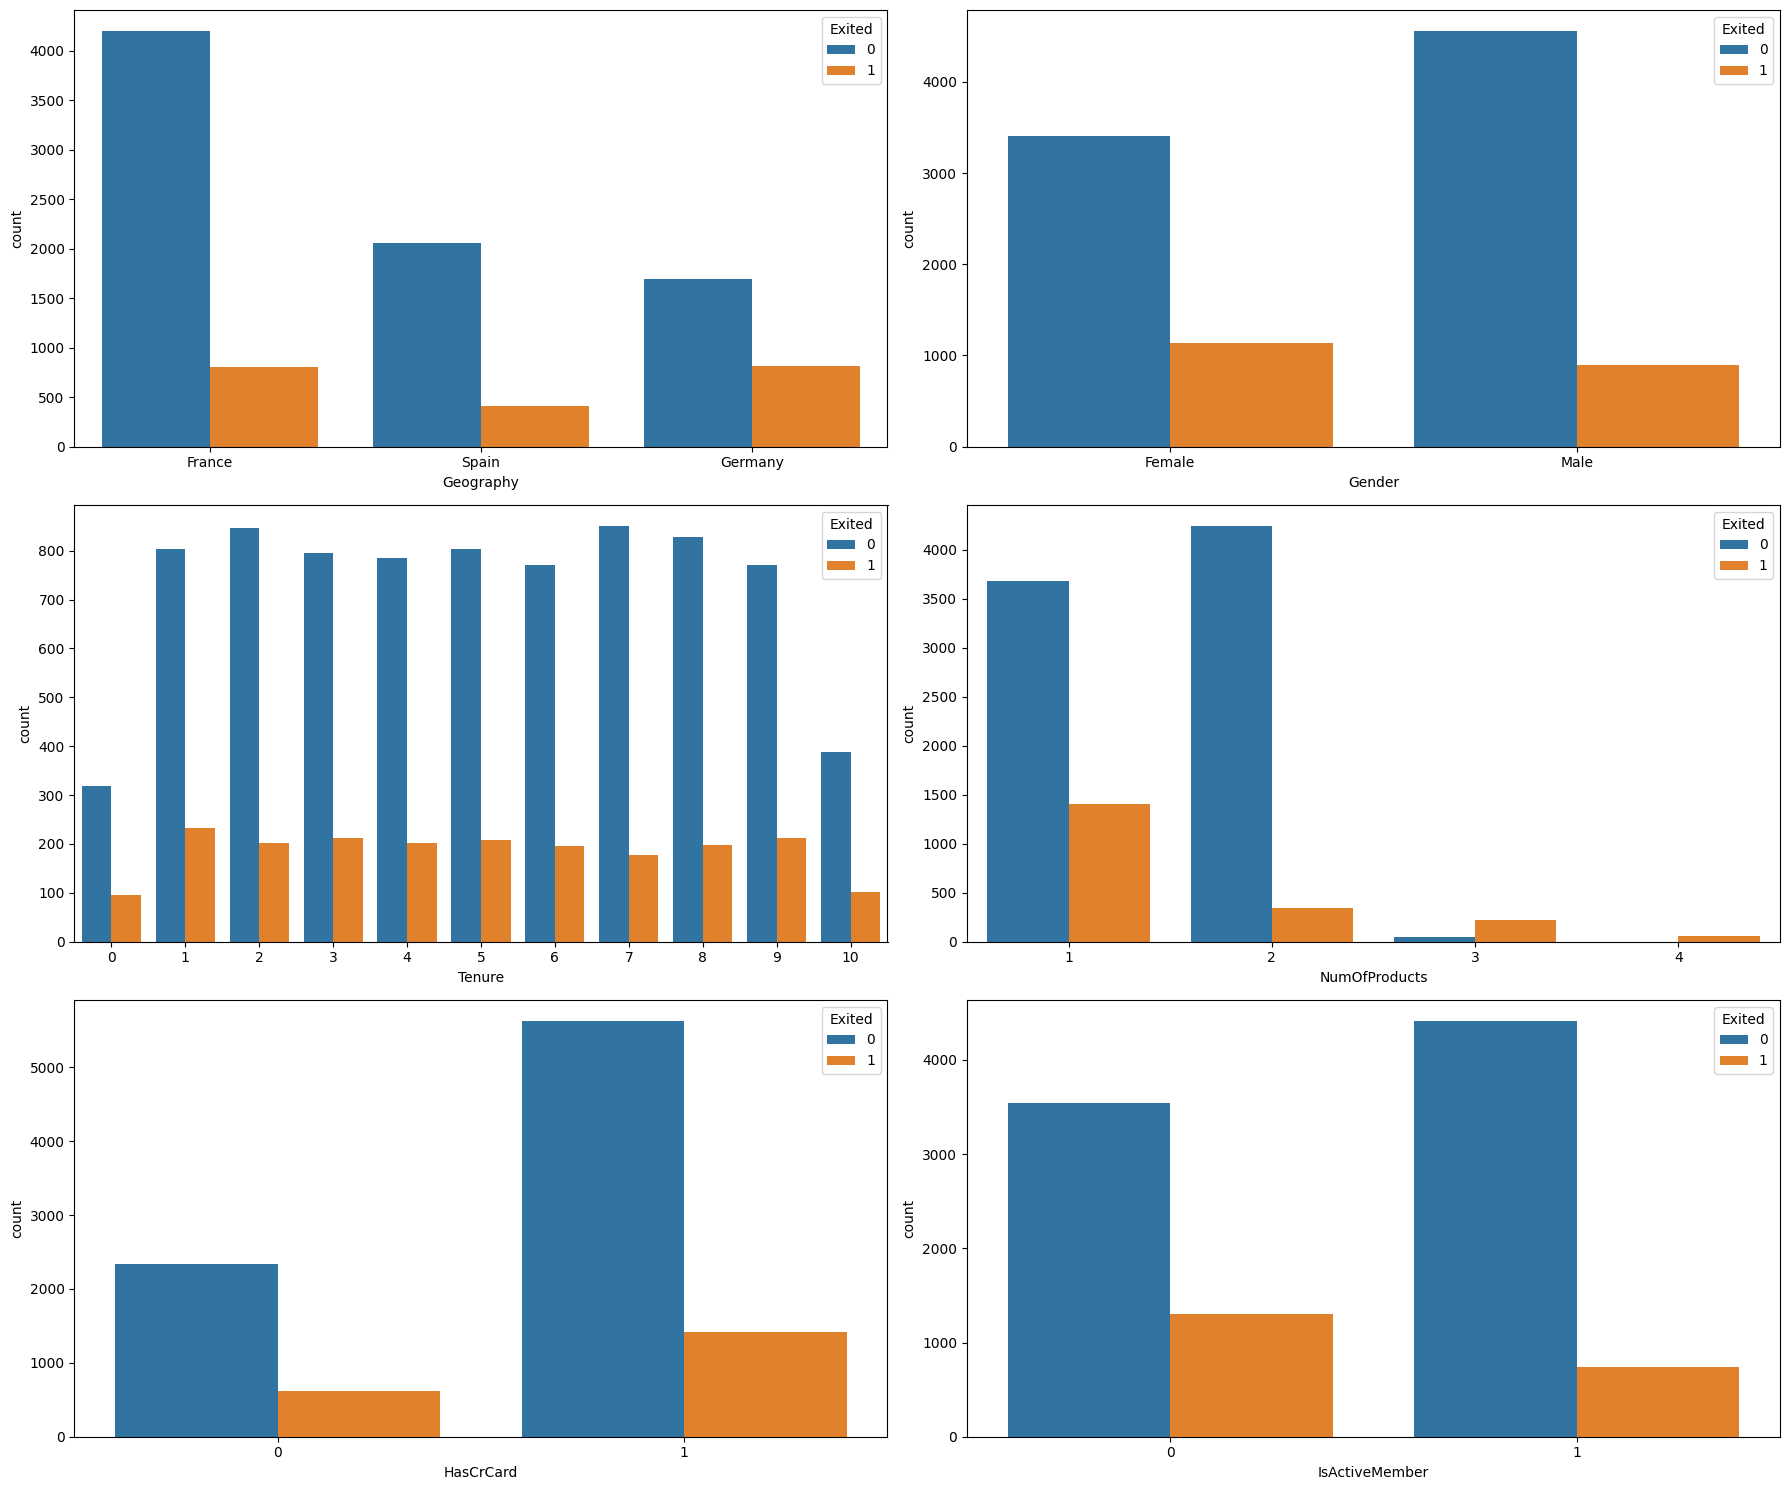

In [72]:
# Visualizing categorical features

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1])

plt.tight_layout()
plt.show()

**From the plot above we can deduce that:**<br>
* From the data majority of customers are from France, but most of the customers who switched are from Germany, perhaps due to a lack of resources due to the small number of customers.<br>
* from the data we can also deduce that the number of female customers who exited is greater than the male customers<br>
* Majority of customers have terms between 1 and 9 years and the churning rate is also high for these terms.<br>
* Most customers have 1 or 2 products, most customers who switch have 1 product, maybe they are not satisfied so they switch.<br>
* the majority of customers who churn are customers who have credit cards, but this could be a coincidence because the majority of customers have credit cards.

## Data Preprocessing <br>

processing the data to carry out further analysis

### inspecting the numerical data for outliers

In [73]:
# creating list of features to inspect
fea_to_inspec = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

### Boxplot<br>

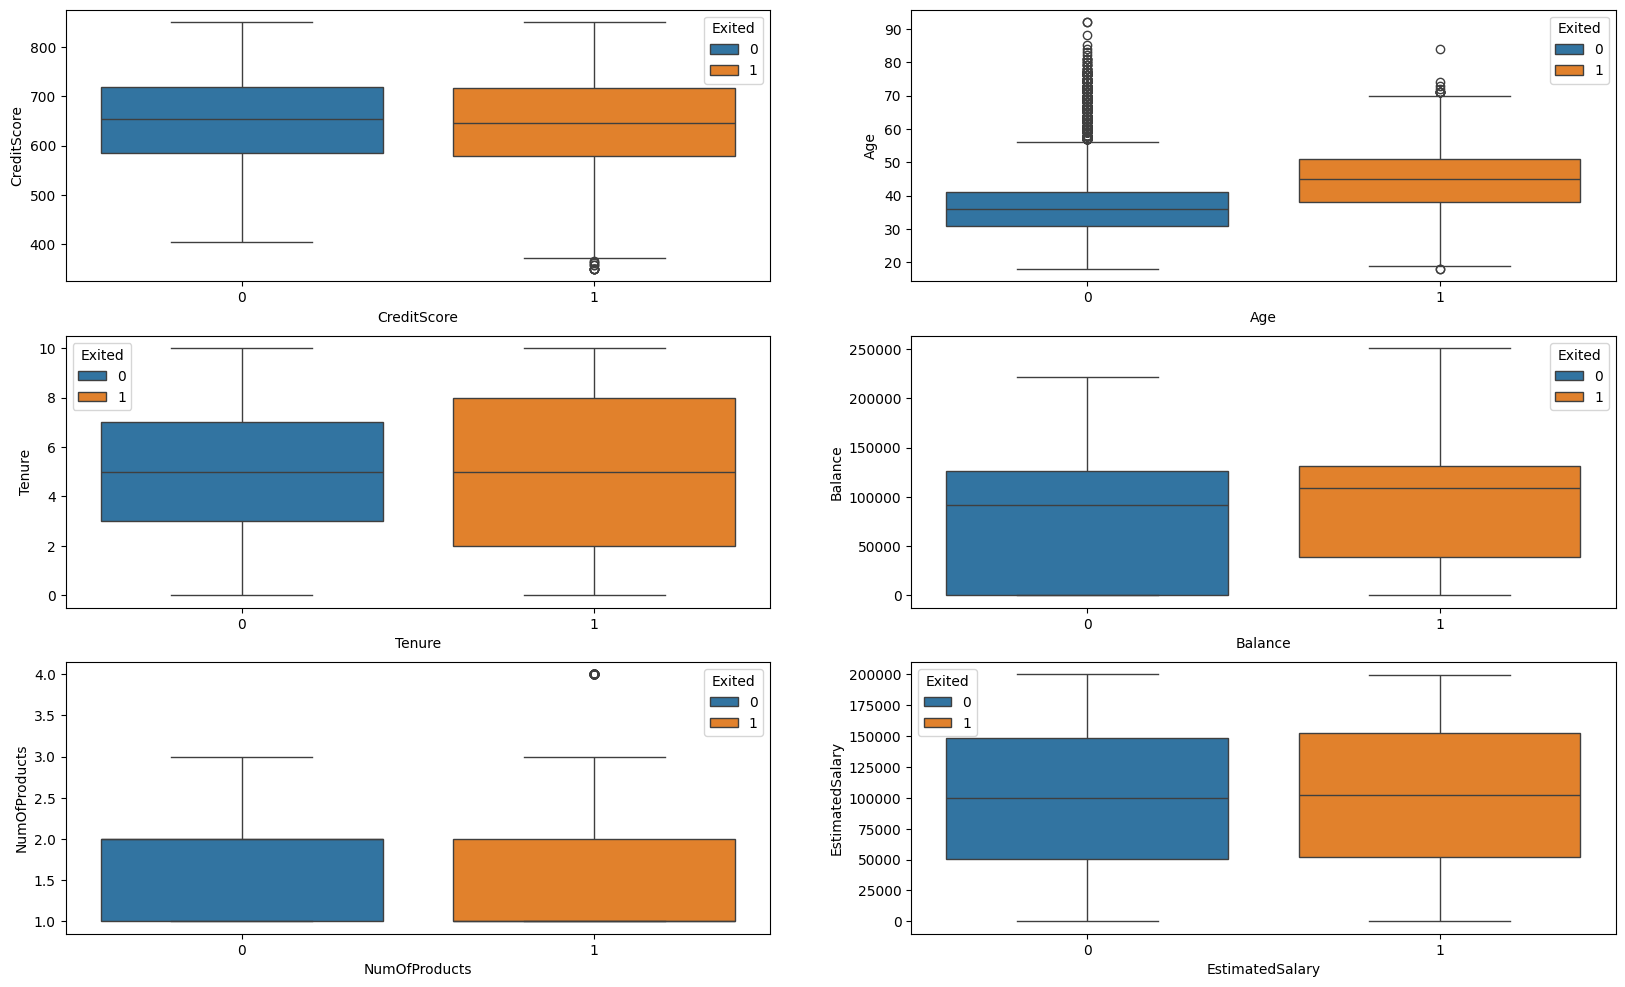

In [74]:
i = 1
plt.figure(figsize=(20,12))
for col in fea_to_inspec:
    plt.subplot(3,2,i)
    sns.boxplot(y=col, x='Exited',hue='Exited', data=df)
    plt.xlabel(col)
    i += 1



the boxplot above visualizes the relationship between the continues data features to the Exited persons. Each boxplot provides insights into the distribution, central tendency, and variability of the data for churned and retained customers.

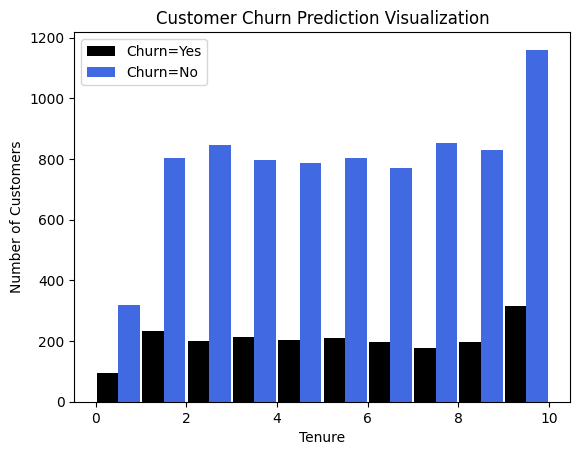

In [75]:
# Extract the 'Tenure' values for churned and cutomers who stayed
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

# Setting the labels for the x-axis, y-axis, and the title of the plot
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plotling the histogram with two datasets: tenure_churn_yes and tenure_churn_no
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['black', 'royalblue'], label=['Churn=Yes', 'Churn=No'])

# Display the legend for differentiating churned and retained customers
plt.legend()

### Feature Engineering

The code below generates two boxplots to visualize the relationships between the derived ratios ('BalanceSalaryRatio' and 'TenureByAge') and the churn status. The boxplots provide insights into the distribution, central tendency, and variability of these ratios for churned and cutomers who stayed.

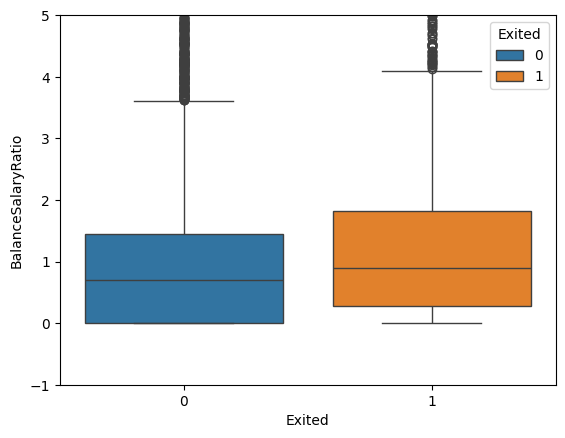

In [76]:
# Calculating the balance to salary ratio and adding it as a new column to the dataset
df['BalanceSalaryRatio'] = df.Balance / df.EstimatedSalary

# Creating a boxplot to visualize the relationship between the balance to salary ratio and churn status
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 5)  # Set the y-axis limits for better visualization

# Display the boxplot
plt.show()

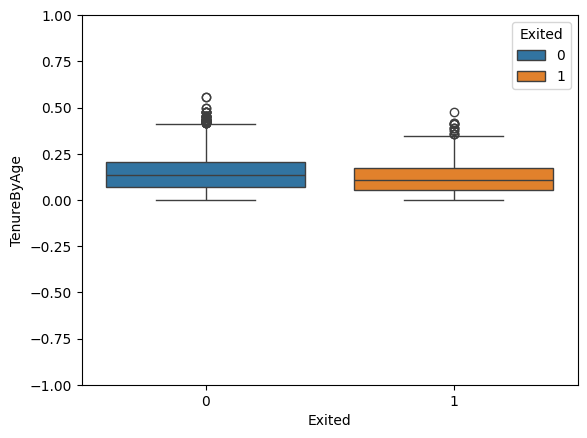

In [77]:
# Calculating the tenure by age ratio and adding it as a new column to the dataset
df['TenureByAge'] = df.Tenure / df.Age

# Creating a boxplot to visualize the relationship between the tenure by age ratio and churn status
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df)
plt.ylim(-1, 1)  # Set the y-axis limits for better visualization

# Display the boxplot
plt.show()

### inspecting the categorical features

the function below will print the categorocal feature and its unique values

In [78]:
def unq_col_val(data):
    # Iterate over each column in the DataFrame
    for col in data:
        # Printing the column name and its unique values
        print(f'{col}: {data[col].unique()}')
            


unq_col_val(cat_df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label encoding<br>

The code below transforms the categorical variables ('Geography' and 'Gender') into numeric representations or one-hot encoded dummy variables. These transformations is performed as part of the feature enginnering to prepare the data for further analysis, modeling, and machine learning.

In [79]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Gender'. 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Creating dummy variables for the 'Geography' column and store the modified DataFrame in 'df'
df = pd.get_dummies(data=df, columns=['Geography']).astype(int)


### dividing the data into inputs and targets

In [80]:
df.columns

Index(['Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'BalanceSalaryRatio', 'TenureByAge', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [81]:
features_rearranged = ['Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'BalanceSalaryRatio', 'TenureByAge', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Exited']

In [82]:
# rearranging the features of the dataset
df_rearranged = df[features_rearranged]
df_rearranged

,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0,619,42,2,0,1,1,1,101348,0,0,1,0,0,1
1,0,608,41,1,83807,1,0,1,112542,0,0,0,0,1,0
2,0,502,42,8,159660,3,1,0,113931,1,0,1,0,0,1
3,0,699,39,1,0,2,0,0,93826,0,0,1,0,0,0
4,0,850,43,2,125510,1,1,1,79084,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,771,39,5,0,2,1,0,96270,0,0,1,0,0,0
9996,1,516,35,10,57369,1,1,1,101699,0,0,1,0,0,0
9997,0,709,36,7,0,1,0,1,42085,0,0,1,0,0,1
9998,1,772,42,3,75075,2,1,0,92888,0,0,0,1,0,1


In [83]:
# this code will split the data into inputs and targets for further analysis
inputs = df_rearranged.iloc[:,0:14]
targets = df_rearranged.iloc[:,14:15]

**Scaling the inputs**<br> 
The purpose of the code snippet below is to scale the selected variables in the DataFrame 'df_rearranged' using the StandardScaler.

Scaling the variables ensures that they are on a similar scale, which can be beneficial to the machine learning algorithms employed. Scaling also helps to prevent certain features from dominating the model simply because they have larger values compared to other features.

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_inputs


array([[-1.09598752, -0.32622142,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-1.09598752, -0.44003595,  0.19816383, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.09598752, -1.53679418,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [-1.09598752,  0.60498839, -0.27860412, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 0.91241915,  1.25683526,  0.29351742, ..., -1.00280393,
         1.72790383, -0.57380915],
       [-1.09598752,  1.46377078, -1.04143285, ...,  0.99720391,
        -0.57873591, -0.57380915]])

In [86]:
pd.DataFrame(columns=df_rearranged.columns[0:14], data=scaled_inputs)

,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,-1.095988,-0.326221,0.293517,-1.041760,-1.225847,-0.911583,0.646092,0.970243,0.021880,-0.032618,0.0,0.997204,-0.578736,-0.573809
1,-1.095988,-0.440036,0.198164,-1.387538,0.117342,-0.911583,-1.547768,0.970243,0.216532,-0.032618,0.0,-1.002804,-0.578736,1.742740
2,-1.095988,-1.536794,0.293517,1.032908,1.333050,2.527057,0.646092,-1.030670,0.240686,-0.023387,0.0,0.997204,-0.578736,-0.573809
3,-1.095988,0.501521,0.007457,-1.387538,-1.225847,0.807737,-1.547768,-1.030670,-0.108920,-0.032618,0.0,0.997204,-0.578736,-0.573809
4,-1.095988,2.063884,0.388871,-1.041760,0.785723,-0.911583,0.646092,0.970243,-0.365269,-0.023387,0.0,-1.002804,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.912419,1.246488,0.007457,-0.004426,-1.225847,0.807737,0.646092,-1.030670,-0.066422,-0.032618,0.0,0.997204,-0.578736,-0.573809
9996,0.912419,-1.391939,-0.373958,1.724464,-0.306384,-0.911583,0.646092,0.970243,0.027983,-0.032618,0.0,0.997204,-0.578736,-0.573809
9997,-1.095988,0.604988,-0.278604,0.687130,-1.225847,-0.911583,-1.547768,0.970243,-1.008645,-0.032618,0.0,0.997204,-0.578736,-0.573809
9998,0.912419,1.256835,0.293517,-0.695982,-0.022607,0.807737,0.646092,-1.030670,-0.125231,-0.032618,0.0,-1.002804,1.727904,-0.573809


The purpose of the code snippet below is to split the data into training and testing sets, where x_train contains the independent features for training, x_test contains the independent features for testing, y_train contains the dependent feature for training, and y_test contains the dependent feature for testing.

In [87]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [88]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, random_state=365, test_size=0.2)


In [89]:
x_train.shape, y_train.shape

((8000, 14), (8000, 1))

In [90]:
y_train.value_counts()

Exited
0         6376
1         1624
Name: count, dtype: int64

# Building Model

**creating validation data**<br>

the code below creates a validation data which will help to know when the model is overfitting and will stop the model when overfitting starts

In [91]:
x_inputs = x_test.shape[0]
sample_count = int(0.5 * x_inputs)
valid_inputs = x_test[:sample_count]
valid_targets = y_test[:sample_count]

In [92]:
#importing tensorflow
import tensorflow as tf

In [93]:
# Set the input and output sizes
input_size = 14
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='sigmoid') # output layer
])

### Choosing the optimizer and the loss function

# define the optimizer we'd like to use,
# the loss function,
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# set the batch size
batch_size = 100

# setting a maximum number of training epochs
max_epochs = 100

# setting an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(x_train, # train inputs
          y_train, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(valid_inputs, valid_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
80/80 - 1s - 17ms/step - accuracy: 0.7784 - loss: 0.5101 - val_accuracy: 0.8250 - val_loss: 0.4072
Epoch 2/100
80/80 - 0s - 1ms/step - accuracy: 0.8231 - loss: 0.4150 - val_accuracy: 0.8510 - val_loss: 0.3745
Epoch 3/100
80/80 - 0s - 1ms/step - accuracy: 0.8413 - loss: 0.3793 - val_accuracy: 0.8740 - val_loss: 0.3426
Epoch 4/100
80/80 - 0s - 1ms/step - accuracy: 0.8536 - loss: 0.3532 - val_accuracy: 0.8690 - val_loss: 0.3294
Epoch 5/100
80/80 - 0s - 1ms/step - accuracy: 0.8559 - loss: 0.3446 - val_accuracy: 0.8750 - val_loss: 0.3237
Epoch 6/100
80/80 - 0s - 1ms/step - accuracy: 0.8595 - loss: 0.3367 - val_accuracy: 0.8810 - val_loss: 0.3223
Epoch 7/100
80/80 - 0s - 1ms/step - accuracy: 0.8621 - loss: 0.3341 - val_accuracy: 0.8790 - val_loss: 0.3234
Epoch 8/100
80/80 - 0s - 1ms/step - accuracy: 0.8625 - loss: 0.3313 - val_accuracy: 0.8790 - val_loss: 0.3203
Epoch 9/100
80/80 - 0s - 1ms/step - accuracy: 0.8648 - loss: 0.3275 - val_accuracy: 0.8740 - val_loss: 0.3212
Epoch 10/

In [94]:
# Evaluating the model on the test data
evaluation = model.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Loss:", evaluation[0])  # Test loss value
print("Test Accuracy:", evaluation[1])  # Test accuracy value



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8656 - loss: 0.3296
Test Loss: 0.346664160490036
Test Accuracy: 0.859499990940094


**converting the predicted values into discrete values of 0s and 1s**

By assigning binary labels based on a threshold value **(0.5 in this case)**, the code converts the predicted values into discrete predictions, which can be further used for performance evaluation and comparison with the actual target values.

In [95]:
# predict output for the test data
prediction = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [96]:
# creating empty list to store the predicted binary labels
result_pred = []

for pred in prediction:
    if pred > 0.5:
        # # If the predicted value is greater than 0.5, assign 1
        result_pred.append(1) 
    else:
        #If the predicted value is less than or equal to 0.5, assign 0
        result_pred.append(0)

In [97]:
from sklearn.metrics import classification_report

# Generate the classification report
print(classification_report(y_test, result_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1587
           1       0.80      0.43      0.56       413

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

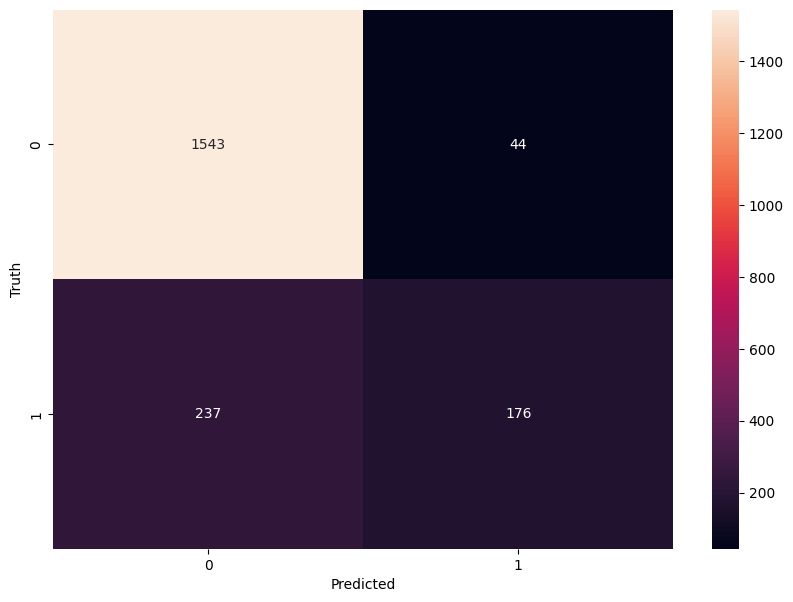

In [98]:
# Calculating the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=result_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')  # 'annot=True' displays the count values in each cell, 'fmt='d'' formats the values as integers
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [99]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, result_pred)
print("Accuracy score is:", accuracy * 100, "%")

Accuracy score is: 85.95 %


# Conclusion 

 The accuracy score of **86.5%** indicates that the model correctly classified 86.5% of the samples in the test dataset. It demonstrates the proportion of accurate predictions compared to the total number of samples.

☞ An accuracy score of 86.7% suggests that the model is performing reasonably well in terms of overall accuracy. However, it is important to consider other evaluation metrics and the specific requirements of the problem domain to obtain a comprehensive understanding of the model's performance.

☞ Remember that accuracy is just one metric, and depending on the nature of the problem, other metrics such as precision, recall, and F1-score may provide additional insights. Evaluating multiple metrics can help you gain a more comprehensive understanding of the model's strengths and weaknesses in different aspects of classification performance.
